In [7]:
import pandas as pd
import numpy as np



Reading data and identifying column names

In [8]:
data = pd.read_csv("u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

item = pd.read_csv("u.item", sep="|", encoding="latin-1", header=None, 
                   names=["movie_id", "title", "release_date", "video_release_date", "IMDb_URL"] + 
                   [f"genre_{i}" for i in range(19)])

user = pd.read_csv("u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip_code"])


Handling missing values

In [9]:
data.isnull().sum()


user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [10]:
item.isnull().sum()

movie_id                 0
title                    0
release_date             1
video_release_date    1682
IMDb_URL                 3
genre_0                  0
genre_1                  0
genre_2                  0
genre_3                  0
genre_4                  0
genre_5                  0
genre_6                  0
genre_7                  0
genre_8                  0
genre_9                  0
genre_10                 0
genre_11                 0
genre_12                 0
genre_13                 0
genre_14                 0
genre_15                 0
genre_16                 0
genre_17                 0
genre_18                 0
dtype: int64

In [11]:
print(item.columns)


Index(['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6', 'genre_7', 'genre_8', 'genre_9', 'genre_10', 'genre_11',
       'genre_12', 'genre_13', 'genre_14', 'genre_15', 'genre_16', 'genre_17',
       'genre_18'],
      dtype='object')


In [12]:
item.drop(columns=["video_release_date"], inplace=True)


In [13]:
item.isnull().sum()

movie_id        0
title           0
release_date    1
IMDb_URL        3
genre_0         0
genre_1         0
genre_2         0
genre_3         0
genre_4         0
genre_5         0
genre_6         0
genre_7         0
genre_8         0
genre_9         0
genre_10        0
genre_11        0
genre_12        0
genre_13        0
genre_14        0
genre_15        0
genre_16        0
genre_17        0
genre_18        0
dtype: int64

In [14]:
most_common_year = item["release_date"].str[-4:].mode()[0]  
print(most_common_year)
item.fillna({"release_date": f"{most_common_year}-01-01"}, inplace=True)



1996


In [16]:
item.isnull().sum()

movie_id        0
title           0
release_date    0
IMDb_URL        3
genre_0         0
genre_1         0
genre_2         0
genre_3         0
genre_4         0
genre_5         0
genre_6         0
genre_7         0
genre_8         0
genre_9         0
genre_10        0
genre_11        0
genre_12        0
genre_13        0
genre_14        0
genre_15        0
genre_16        0
genre_17        0
genre_18        0
dtype: int64

In [17]:
most_common_url=item["IMDb_URL"].mode()[0]
print(most_common_url)
item["IMDb_URL"].fillna(most_common_url, inplace=True)


http://us.imdb.com/M/title-exact?Body%20Snatchers%20(1993)


C:\Users\alaa_\AppData\Local\Temp\ipykernel_12384\961786888.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  item["IMDb_URL"].fillna(most_common_url, inplace=True)


In [18]:
item.isnull().sum()

movie_id        0
title           0
release_date    0
IMDb_URL        0
genre_0         0
genre_1         0
genre_2         0
genre_3         0
genre_4         0
genre_5         0
genre_6         0
genre_7         0
genre_8         0
genre_9         0
genre_10        0
genre_11        0
genre_12        0
genre_13        0
genre_14        0
genre_15        0
genre_16        0
genre_17        0
genre_18        0
dtype: int64

In [19]:
user.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

Data types and Summary statistics

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
item_id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [21]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [22]:
item.describe().T

,count,mean,std,min,25%,50%,75%,max
movie_id,1682.0,841.500000,485.695893,1.0,421.25,841.5,1261.75,1682.0
genre_0,1682.0,0.001189,0.034473,0.0,0.00,0.0,0.00,1.0
genre_1,1682.0,0.149227,0.356418,0.0,0.00,0.0,0.00,1.0
genre_2,1682.0,0.080262,0.271779,0.0,0.00,0.0,0.00,1.0
genre_3,1682.0,0.024970,0.156081,0.0,0.00,0.0,0.00,1.0
genre_4,1682.0,0.072533,0.259445,0.0,0.00,0.0,0.00,1.0
genre_5,1682.0,0.300238,0.458498,0.0,0.00,0.0,1.00,1.0
genre_6,1682.0,0.064804,0.246253,0.0,0.00,0.0,0.00,1.0
genre_7,1682.0,0.029727,0.169882,0.0,0.00,0.0,0.00,1.0
genre_8,1682.0,0.431034,0.495368,0.0,0.00,0.0,1.00,1.0


In [23]:
print(item.dtypes)

movie_id         int64
title           object
release_date    object
IMDb_URL        object
genre_0          int64
genre_1          int64
genre_2          int64
genre_3          int64
genre_4          int64
genre_5          int64
genre_6          int64
genre_7          int64
genre_8          int64
genre_9          int64
genre_10         int64
genre_11         int64
genre_12         int64
genre_13         int64
genre_14         int64
genre_15         int64
genre_16         int64
genre_17         int64
genre_18         int64
dtype: object


In [24]:
print(user.dtypes)

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object


In [25]:
print(data.dtypes)

user_id      int64
item_id      int64
rating       int64
timestamp    int64
dtype: object


Convert the data into a User-Item Interaction Matrix (rows = users, columns =
movies, values = ratings)

In [107]:
user_item_matrix = data.pivot(index="user_id", columns="item_id", values="rating")

In [108]:
print(user_item_matrix.head())

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   N

Handling missing values

Noramlize the ratings to ensure fair comparisons

In [105]:
normalized_user_item_matrix = (user_item_matrix - user_item_matrix.mean()) / user_item_matrix.std()


In [106]:
print(normalized_user_item_matrix.head())

item_id      1         2             3             4             5     \
user_id                                                                 
1        1.747057 -0.574045  2.593178e+00 -1.213352e+00 -1.063397e+00   
2        0.189523  0.000000  1.191313e-15 -1.958554e-15 -1.562034e-15   
3        0.000000  0.000000  1.191313e-15 -1.958554e-15 -1.562034e-15   
4        0.000000  0.000000  1.191313e-15 -1.958554e-15 -1.562034e-15   
5        0.189523 -0.574045  1.191313e-15 -1.958554e-15 -1.562034e-15   

item_id          6             7             8             9             10    \
user_id                                                                         
1        6.711921e+00  3.185299e-01 -6.212518e+00  1.882518e+00 -2.682936e+00   
2       -6.283620e-15 -1.403814e-15 -1.842079e-15 -7.574722e-16 -5.909710e+00   
3       -6.283620e-15 -1.403814e-15 -1.842079e-15 -7.574722e-16 -1.432976e-15   
4       -6.283620e-15 -1.403814e-15 -1.842079e-15 -7.574722e-16 -1.432976e-15   
5 

KNN Algorithm for recommentations

In [105]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.0 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.1 MB 2.9 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.1 MB 2.9 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.9 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 2.9 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.1 MB 2.9 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 2.9 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.1 MB 2.9 MB/s eta 0:00:03
   -------------------- ------------------- 5.8/11.1 MB 2.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 2.9 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 2.9 MB/s eta 0:00:02
   ----------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Use KNN with cosine similarity to find similar users

In [1]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, accuracy_score




In [92]:
user_similarity = cosine_similarity(normalized_user_item_matrix.fillna(0)) 

In [93]:
user_similarity_df = pd.DataFrame(user_similarity, index=normalized_user_item_matrix.index, columns=normalized_user_item_matrix.index)

In [125]:
print("User Similarity Matrix:\n", user_similarity_df.head())


User Similarity Matrix:
 user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.006000  0.009740 -0.009925  0.032810  0.002708 -0.009751   
2        0.006000  1.000000 -0.021108  0.001033  0.001144  0.005201  0.001024   
3        0.009740 -0.021108  1.000000 -0.008293 -0.000009  0.028089 -0.005109   
4       -0.009925  0.001033 -0.008293  1.000000  0.001876 -0.023753 -0.014791   
5        0.032810  0.001144 -0.000009  0.001876  1.000000  0.001226 -0.035912   

user_id       8         9         10   ...       934       935       936  \
user_id                                ...                                 
1        0.055125  0.037932  0.004175  ... -0.014623 -0.038772  0.051452   
2        0.004463 -0.017864  0.010864  ...  0.005728  0.002303 -0.016070   
3        0.126918  0.001005  0.001216  ... -0.000076 -0.002524 -0.006660   
4        0.026723  0.008045

Get nearest neighbors to a given user

In [126]:
def get_nearest_neighbors(target_user, k):
    similar_users=user_similarity_df[target_user].drop(target_user).nlargest(k)
    return similar_users.index.tolist()

target_user = 1  
k_neighbors = get_nearest_neighbors(target_user, k=4)

print(f"Top {len(k_neighbors)} similar users to User {target_user}:", k_neighbors)

Top 4 similar users to User 1: [97, 778, 566, 334]


Given a target user, recommend the top-rated movies from their nearest
neighbors

In [127]:
movies = item[['movie_id', 'title']]

In [128]:
def recommend_movies(target_user, k=4, top_n=5): 

    neighbors = get_nearest_neighbors(target_user, k)
    print(f"Top {k} neighbors for User {target_user}: {neighbors}")

    neighbor_ratings = user_item_matrix.loc[neighbors]    

    high_rated_movies = neighbor_ratings[neighbor_ratings >= 3.5]

    # Step 3: Remove movies the target user has already rated
    user_rated_movies = set(user_item_matrix.loc[target_user].dropna().index)

    # Drop already rated movies
    recommended_movies = high_rated_movies.drop(columns=user_rated_movies, errors="ignore")

    # Check if any recommendations remain
    if recommended_movies.dropna(how="all").empty:
        print(f"No new recommendations found for User {target_user}. Try increasing `k` or lowering rating threshold.")
        return []

    # Step 4: Count recommendations and get top N movies
    movie_scores = recommended_movies.count().sort_values(ascending=False)
    top_movie_ids = movie_scores.head(top_n).index.tolist()

    # Step 5: Map movie IDs to titles
    recommended_movie_titles = movies.set_index("movie_id").reindex(top_movie_ids)["title"].dropna().tolist()

    return recommended_movie_titles


In [129]:
target_user = 20
recommended_movies = recommend_movies(target_user)
print(f"Recommended Movies for User {target_user}:", recommended_movies)



Top 4 neighbors for User 20: [843, 571, 908, 935]
Recommended Movies for User 20: ['Alien (1979)', 'Terminator, The (1984)', 'Godfather, The (1972)', 'Forbidden Planet (1956)', 'Manchurian Candidate, The (1962)']


Precision and Recall to evaluate the quality of
recommendations

In [163]:
def load_data(fold):
    train_data = pd.read_csv(f'u{fold}.base', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
    test_data = pd.read_csv(f'u{fold}.test', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
    return train_data, test_data

In [164]:
def preprocess_data(train_data, test_data):
    all_items=set(train_data['item_id']).union(set(test_data['item_id']))

    train_matrix=train_data.pivot(index='user_id',columns='item_id',values='rating').reindex(columns=all_items).fillna(0)
    test_matrix=test_data.pivot(index='user_id',columns='item_id',values='rating').reindex(columns=all_items).fillna(0)

    X_train=train_matrix.values
    y_train=(train_matrix > 3.5).astype(int).values 
    X_test=test_matrix.values
    y_test=(test_matrix > 3.5).astype(int).values
    
    return X_train, y_train, X_test, y_test 

In [165]:
def train_knn(n_neighbors,X_train,y_train):
    knn_model=KNeighborsClassifier(n_neighbors, metric='cosine')
    knn_model.fit(X_train, y_train)
    return knn_model

In [166]:
def evaluate_knn_model(knn_model,X_test,y_test):
    y_pred=knn_model.predict(X_test)
    accuracy=accuracy_score(y_test.ravel(),y_pred.ravel())
    precision=precision_score(y_test.ravel(), y_pred.ravel())
    recall=recall_score(y_test.ravel(), y_pred.ravel(), average='macro', zero_division=0)
    return accuracy, precision, recall

In [175]:

def run_knn(n_neighbors):

    accuracies, precisions, recalls = [], [], []

    for fold in range(1, 6):  
        train_data, test_data = load_data(fold)
        X_train, y_train, X_test, y_test = preprocess_data(train_data, test_data)
        
        knn_model = train_knn(n_neighbors,X_train, y_train)
        accuracy, precision, recall = evaluate_knn_model(knn_model, X_test, y_test)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)

        print(f"Fold {fold} Accuracy: {accuracy:.4f}")
        print(f"Fold {fold} Precision: {precision:.4f}")
        print(f"Fold {fold} Recall: {recall:.4f}\n")

    return {
        'k': n_neighbors,
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls)
    }


In [169]:
run_knn(3)

Fold 1 Accuracy: 0.9719
Fold 1 Precision: 0.2383
Fold 1 Recall: 0.7012

Fold 2 Accuracy: 0.9796
Fold 2 Precision: 0.2170
Fold 2 Recall: 0.6838

Fold 3 Accuracy: 0.9831
Fold 3 Precision: 0.1965
Fold 3 Recall: 0.6943

Fold 4 Accuracy: 0.9842
Fold 4 Precision: 0.1968
Fold 4 Recall: 0.6955

Fold 5 Accuracy: 0.9848
Fold 5 Precision: 0.2105
Fold 5 Recall: 0.7057



Test different values of k to see its effect on recommendations


In [177]:
k_values = [1, 3, 5]
final_results=[]

for k in k_values:
    results=run_knn(k)
    final_results.append(results)
df_results =pd.DataFrame(final_results).T
print(df_results)

Fold 1 Accuracy: 0.9605
Fold 1 Precision: 0.1716
Fold 1 Recall: 0.7080

Fold 2 Accuracy: 0.9695
Fold 2 Precision: 0.1484
Fold 2 Recall: 0.6966

Fold 3 Accuracy: 0.9740
Fold 3 Precision: 0.1281
Fold 3 Recall: 0.7007

Fold 4 Accuracy: 0.9757
Fold 4 Precision: 0.1285
Fold 4 Recall: 0.7023

Fold 5 Accuracy: 0.9760
Fold 5 Precision: 0.1364
Fold 5 Recall: 0.7154

Fold 1 Accuracy: 0.9719
Fold 1 Precision: 0.2383
Fold 1 Recall: 0.7012

Fold 2 Accuracy: 0.9796
Fold 2 Precision: 0.2170
Fold 2 Recall: 0.6838

Fold 3 Accuracy: 0.9831
Fold 3 Precision: 0.1965
Fold 3 Recall: 0.6943

Fold 4 Accuracy: 0.9842
Fold 4 Precision: 0.1968
Fold 4 Recall: 0.6955

Fold 5 Accuracy: 0.9848
Fold 5 Precision: 0.2105
Fold 5 Recall: 0.7057

Fold 1 Accuracy: 0.9755
Fold 1 Precision: 0.2713
Fold 1 Recall: 0.6940

Fold 2 Accuracy: 0.9825
Fold 2 Precision: 0.2516
Fold 2 Recall: 0.6746

Fold 3 Accuracy: 0.9859
Fold 3 Precision: 0.2341
Fold 3 Recall: 0.6876

Fold 4 Accuracy: 0.9870
Fold 4 Precision: 0.2381
Fold 4 Recall: 

plotting recommendation performance based on values of k

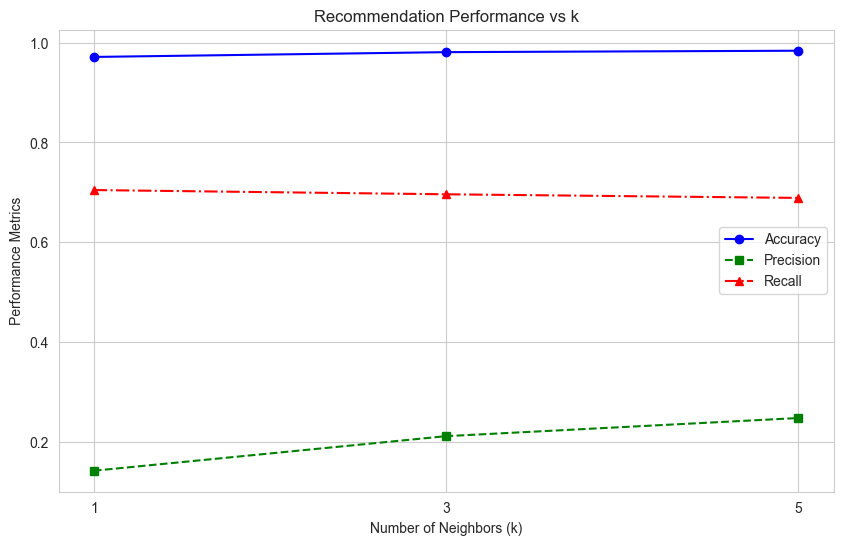

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_results = pd.DataFrame(final_results)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.plot(df_results['k'], df_results['accuracy'], marker='o', linestyle='-', label='Accuracy', color='blue')
plt.plot(df_results['k'], df_results['precision'], marker='s', linestyle='--', label='Precision', color='green')
plt.plot(df_results['k'], df_results['recall'], marker='^', linestyle='-.', label='Recall', color='red')


plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Performance Metrics")
plt.title("Recommendation Performance vs k")
plt.legend()
plt.xticks(df_results['k'])
plt.show()


In [173]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.9 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.0 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 2.1 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/8.1 MB 2.0 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/8.1 MB 2.0 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.6 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.6 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.5 MB/s eta 0:00:04
   ------------------ --------------------- 3.7/8.1 MB 1.5 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.1 MB 1.6 MB/s eta 0:00:03
   -----------------------

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


Plotting similarity distributions for one fold using k=3

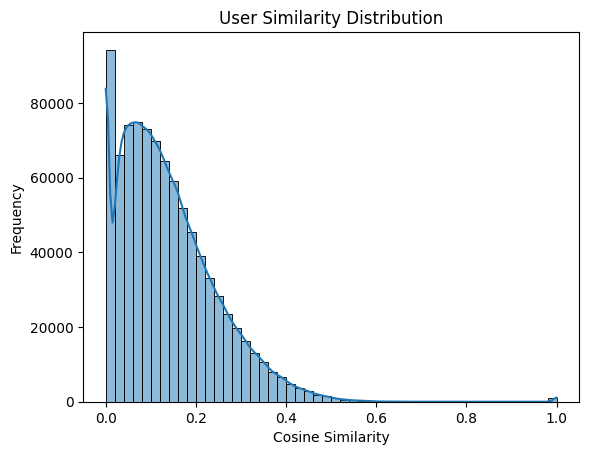

In [ ]:
train_data = pd.read_csv('u1.base', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
train_matrix = train_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
user_similarity = cosine_similarity(train_matrix)

sns.histplot(user_similarity.flatten(), bins=50, kde=True)
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("User Similarity Distribution")
plt.show()